In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
with open('data_100cl.csv') as f:
    data = f.read().split('\n')
if not data[-1].split(';')[-1]:
    data = data[:-1]
data = [l.split(';') for l in data]
data = [[int(t), i, float(tt)] for t, i, tt in data]
df = pd.DataFrame(data, columns=['time', 'id', 'value'])
df = df[df['value'] > 0]
df['time'] -= df[df['id'] == 'P']['time'].iloc[0]
df['cl'] = 100
df_100 = df
p_filter_100 = df_100['id'] == 'P'

In [3]:
with open('data_50cl.csv') as f:
    data = f.read().split('\n')
if not data[-1].split(';')[-1]:
    data = data[:-1]
data = [l.split(';') for l in data]
data = [[int(t), i, float(tt)] for t, i, tt in data]
df = pd.DataFrame(data, columns=['time', 'id', 'value'])
df = df[df['value'] > 0]
df['time'] -= df[df['id'] == 'P']['time'].iloc[0]
df['cl'] = 50
df_50 = df
p_filter_50 = df_50['id'] == 'P'

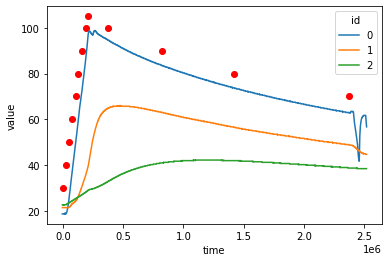

In [4]:
ax = sns.lineplot(data=df_100[~p_filter_100], x='time', y='value', hue='id')
ax.scatter(df_100[p_filter_100]['time'], df_100[p_filter_100]['value'], color='red')

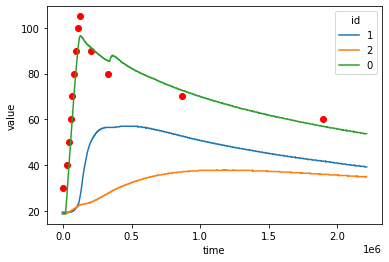

In [5]:
ax = sns.lineplot(data=df_50[~p_filter_50], x='time', y='value', hue='id')
ax.scatter(df_50[p_filter_50]['time'], df_50[p_filter_50]['value'], color='red')

In [6]:
df = pd.concat((df_50, df_100))

In [7]:
p_filter = df['id'] == 'P'

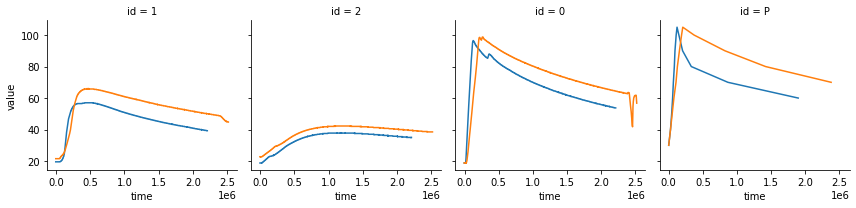

In [8]:
sns.FacetGrid(df, col='id', hue='cl').map(sns.lineplot, 'time', 'value')

- 0 : in the water
- 1 : in the handle
- 2 : under the base
- P : cooking thermometer

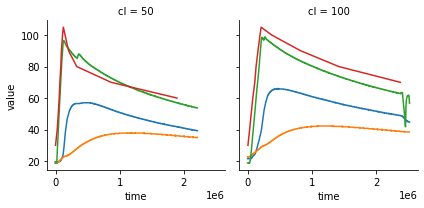

In [9]:
ax = sns.FacetGrid(df, col='cl', hue='id').map(sns.lineplot, 'time', 'value')

<AxesSubplot:xlabel='time', ylabel='value'>

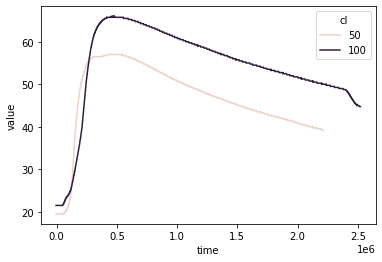

In [10]:
sns.lineplot(data=df[df['id']=='1'], x='time', y='value', hue='cl')